In [1]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *
from rsna_retro.train3d import *

Loading imports


In [2]:
torch.cuda.set_device(3)

In [3]:
df_any = Meta.df_any
df_any.head()

,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,...,MultiWindowCenter,WindowCenter1,MultiWindowWidth,WindowWidth1,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
SOPInstanceUID,,,,,,,,,,,,,,,,,,,,,
ID_2a8702d25,CT,ID_ff137633,ID_d17053848c,ID_7098f7c836,,-126.437378,1.0,1,MONOCHROME2,512,...,NaN,NaN,NaN,NaN,1,0,1,1,0,0
ID_66891ac22,CT,ID_42940b2c,ID_17e33f43d0,ID_e14dd0090b,,-125.000000,1.0,1,MONOCHROME2,512,...,NaN,NaN,NaN,NaN,1,0,1,0,0,0
ID_8e6e5b51f,CT,ID_76fbed32,ID_1d8eaa14ef,ID_e3919709a0,,-125.000000,1.0,1,MONOCHROME2,512,...,NaN,NaN,NaN,NaN,1,0,0,0,0,1
ID_cb8b9b514,CT,ID_20039b63,ID_1cfe3e70dd,ID_e3b5d8d9b8,,-125.000000,1.0,1,MONOCHROME2,512,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
ID_ee683911f,CT,ID_a065f3ac,ID_9c727ac231,ID_99e83a310d,,-125.000000,1.0,1,MONOCHROME2,512,...,1.0,40.0,1.0,80.0,0,0,0,0,0,0


In [4]:
dls_feat = get_3d_dls_feat(df_any, bs=16)

## Model

In [5]:
m = get_3d_head()
learn = get_learner(dls_feat, m)

In [6]:
learn.add_cb(DePadLoss())

In [9]:
# def get_model_learner(dbch, model, lf=None, pretrained=False, opt_func=None, metrics=None, fp16=True, config=None):
#     if lf is None: lf = get_loss()
#     if metrics is None: metrics=[accuracy_multi,accuracy_any]
#     if opt_func is None: opt_func = partial(Adam, wd=1e-5, eps=1e-4, sqr_mom=0.999)
#     if config is None: config=dict(ps=0., lin_ftrs=[], concat_pool=False)
#     learn = Learner(dbch, model, loss_func=lf, lr=3e-3,
#                         opt_func=opt_func, metrics=metrics)
#     return learn.to_fp16() if fp16 else learn

In [11]:
# learn.load(f'runs/baseline_any-2b', strict=False)

In [12]:
# learn.summary()

## Training

In [7]:
name = 'train3d_baseline_feat'

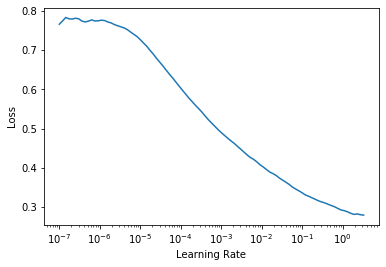

In [8]:
learn.lr_find()

In [9]:
do_fit(learn, 10, 1e-1)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.123400,0.181080,0.940498,0.893498,01:25
1,0.115699,0.191726,0.943363,0.903298,01:22
2,0.111429,0.167378,0.944608,0.905178,01:26
3,0.112184,0.179187,0.943420,0.897868,01:24
4,0.108705,0.173621,0.943906,0.900569,01:24
5,0.106566,0.188334,0.945495,0.900993,01:23
6,0.101750,0.168781,0.946325,0.905443,01:25
7,0.093019,0.169086,0.946479,0.904410,01:23
8,0.079321,0.188312,0.947124,0.904384,01:24
9,0.068149,0.201488,0.946449,0.902424,01:24
